# En notebook for å lage clustre fra kollokasjoner

Ord kan dann clustre via en kollokasjonsanalyse. Her litt engelsk forklaring:

The term collocation has traditionally been restricted to words that are juxtaposed together as phrases like “strong coffee”, “strict regime” or “eat dinner”. Here we take collocations to be realized as skipgrams, or as word pairs that simply cooccur within a context which in itself is a contiguous sequence of words, typically a paragraph or a window of n words around a given word. Juxtaposed collocates will also be part of the result set. 

The collocates for W is the words that are associated with W based on a measure of association. The purpose of such a measure for a word W (e.g. “democracy”) is to provide a means of collecting associated words in the discourses in which W occurs within C. Collocations can be viewed as collecting discourse markers for W, in the sense that the collocates are uttered (written or spoken) together with W. The collocates for W are computed via an association measure on the set of all cooccurrent words. 


Start med å importere de kommandoene som trengs fra nbtext

In [17]:
import nbtext as nb
from nbtext import cloud, get_urn, Cluster, Corpus

%matplotlib inline

### Definer et cluster for et ord over en gitt periode fra bøker eller aviser

In [106]:
word='infrastruktur'
korpus = 'avis'
exp=1.06

In [19]:
brev_cluster_50_70 = Cluster(
    word, 
    period=(1950, 1970), 
    before=5, 
    after=5, 
    corpus=korpus,
    reference=150, 
    word_samples=500)

In [20]:
brev_cluster_70_80 = Cluster(
    word, 
    period=(1970, 1980), 
    before=5, 
    after=5, 
    corpus=korpus,
    reference=150, 
    word_samples=500)

In [21]:
brev_cluster_80_90 = Cluster(
    word, 
    period=(1980, 1990), 
    before=5, 
    after=5, 
    corpus=korpus,
    reference=150, 
    word_samples=500)

In [22]:
brev_cluster_90_00 = Cluster(
    word, 
    period=(1990, 2000), 
    before=5, 
    after=5, 
    corpus=korpus,
    reference=150, 
    word_samples=500)

In [24]:
brev_cluster_00_10 = Cluster(
    word, 
    period=(2000, 2010), 
    before=5, 
    after=5, 
    corpus=korpus,
    reference=150, 
    word_samples=500)

# Inspiser clustre

Hvilke ord er knyttet til clustringsordet, er det variasjon i kontekst, trengs det mer data. Er resultatet tolkbart?

In [25]:
brev_cluster_50_70.cluster_set(top=250, exponent=1.01)

In [37]:
brev_cluster_00_10.search_words("militære , .  i kultur kulturelle åndelig religiøs vei veier jernbane fly flyplass flyplasser")

infrastruktur
veier            1.099385
jernbane         0.948564
vei              0.938641
kultur           0.822228
flyplass         0.818181
,                0.788913
kulturelle       0.775942
militære         0.753768
flyplasser       0.729104
i                0.655934
fly              0.640567
.                0.538582

In [107]:
a = []
a.append(brev_cluster_50_70.cluster_set(top= 500, exponent=exp, aslist=False))
a.append(brev_cluster_70_80.cluster_set(top = 500, exponent=exp, aslist=False))
a.append(brev_cluster_80_90.cluster_set(top= 500, exponent=exp, aslist=False))
a.append(brev_cluster_90_00.cluster_set(top = 500, exponent=exp, aslist=False))
a.append(brev_cluster_00_10.cluster_set(top = 500, exponent=exp, aslist=False))


In [108]:
def df_combine(array_df):
    """Combine one columns dataframes"""
    import pandas as pd
    cols = []
    for i in range(len(a)):
        #print(i)
        if array_df[i].columns[0] in cols:
            array_df[i].columns = [array_df[i].columns[0] + '_' + str(i)]
        cols.append(array_df[i].columns[0])
    return pd.concat(a, axis=1, sort=True)

In [109]:
b = df_combine(a)

In [110]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [126]:
def f(columns, column_nr):
    return b.sort_values(by=b.columns[column_nr], ascending=False)[:50]

In [127]:
interact(f,columns=b.columns, column_nr=(0,4));

interactive(children=(Dropdown(description='columns', options=('infrastruktur', 'infrastruktur_1', 'infrastruk…

In [26]:
brev_cluster_70_80.cluster_set(top=250, exponent=1.01)

In [27]:
brev_cluster_80_90.cluster_set(top=250, exponent=1.01)

In [28]:
brev_cluster_90_00.cluster_set(top=250, exponent=1.01)

In [29]:
brev_cluster_00_10.cluster_set(top=250, exponent=1.01)

Clustret kan studeres som en ordsky

# Tegn en ordsky


kommandoen for å tegne en ordsky er *cloud()*. Argumentet kan være mange ting, så lenge det kobler et ord til et tall. Datarammer som består av en kolonne fungerer fint.

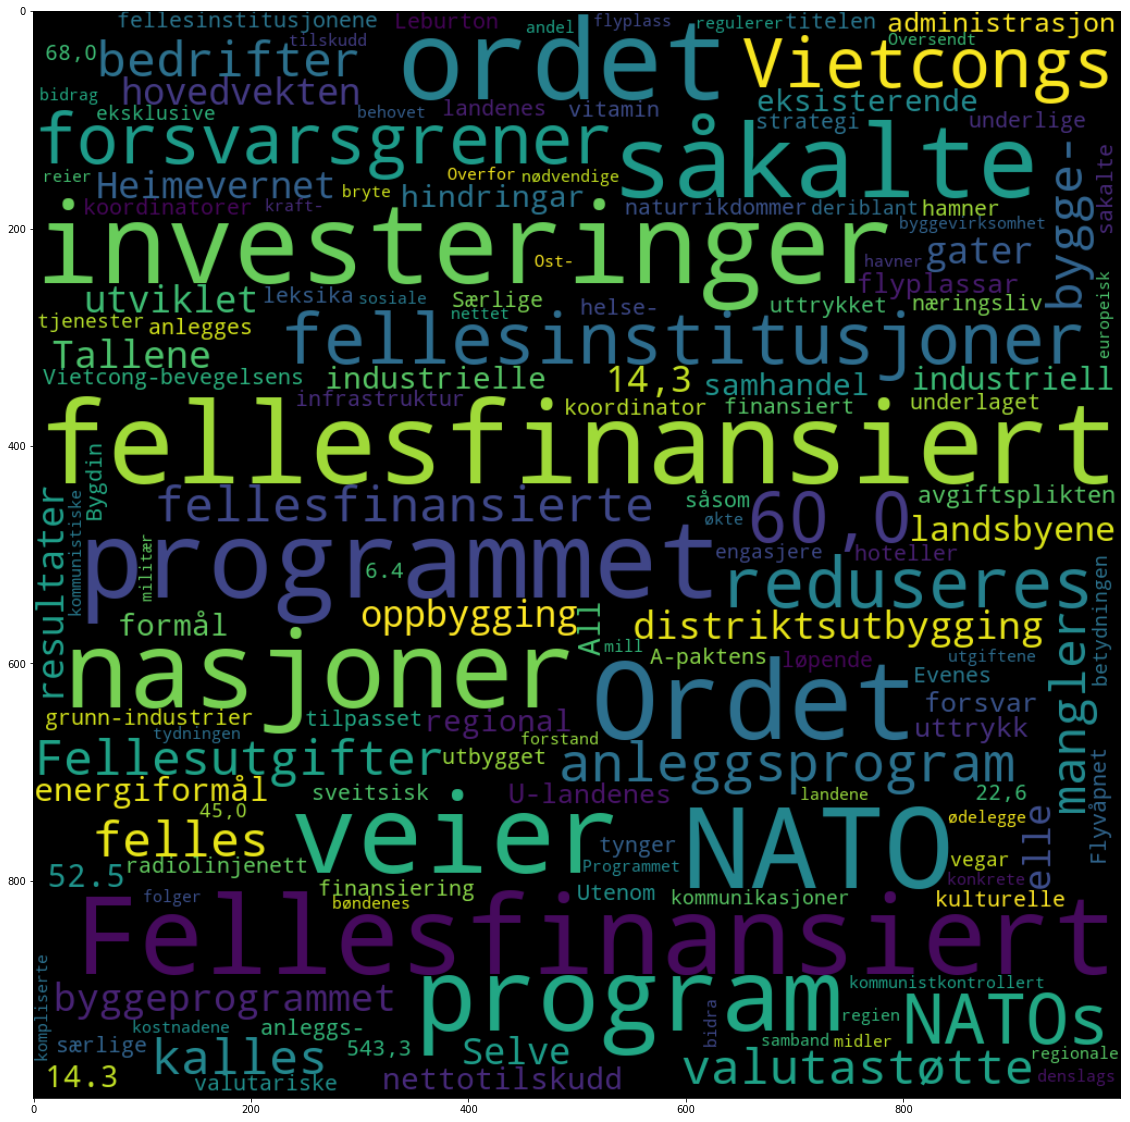

In [30]:
nb.cloud(brev_cluster_50_70.cluster_set(aslist=False, exponent=exp)[:150], background='black')

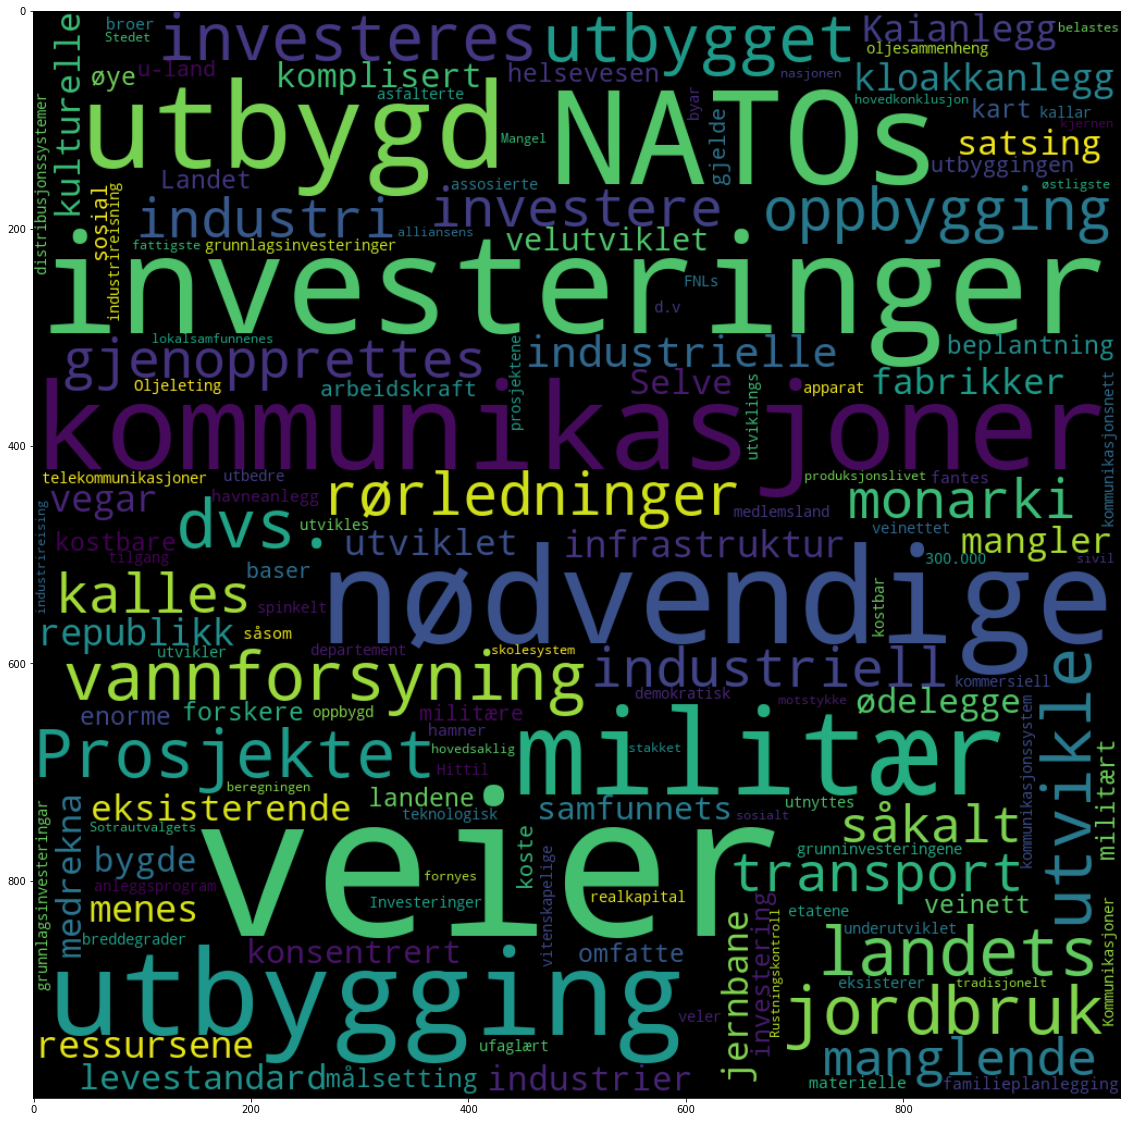

In [31]:
nb.cloud(brev_cluster_70_80.cluster_set(aslist=False, exponent=exp)[:150], background='black')

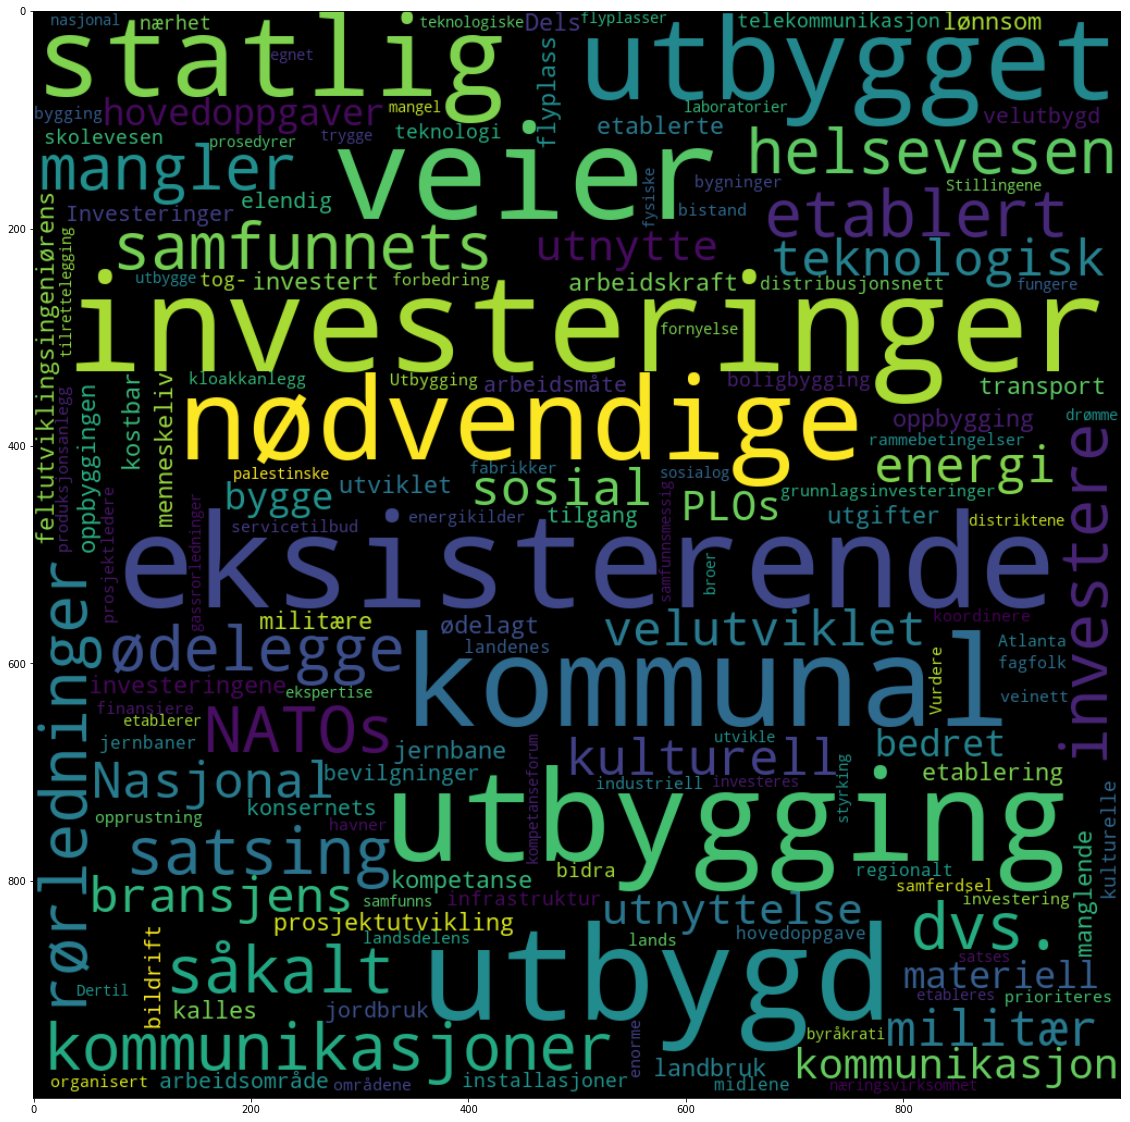

In [32]:
nb.cloud(brev_cluster_80_90.cluster_set(aslist=False, exponent=exp)[:150], background='black')

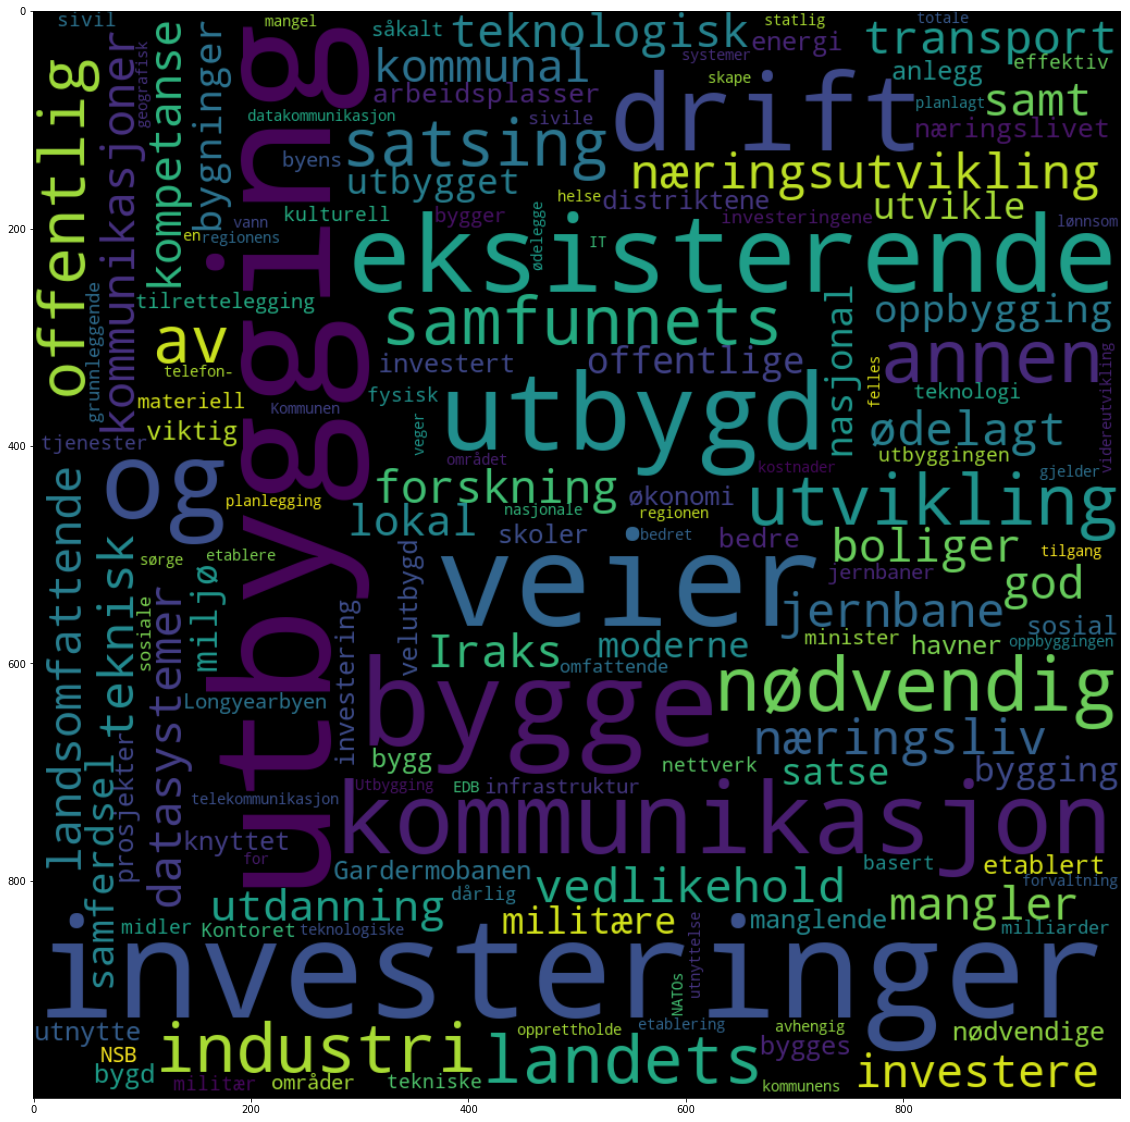

In [33]:
nb.cloud(brev_cluster_90_00.cluster_set(aslist=False)[:150], background='black')

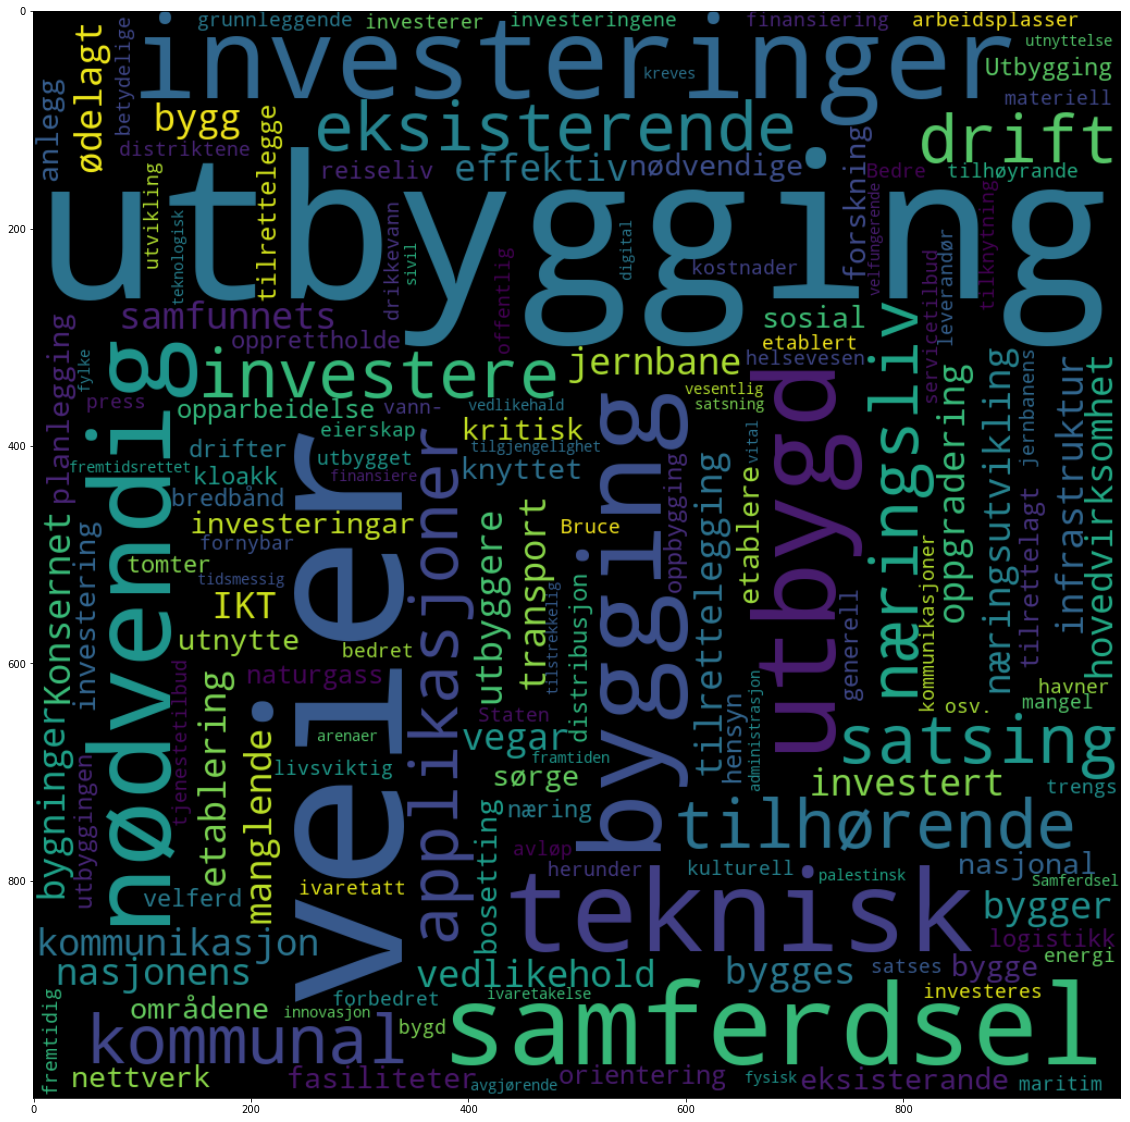

In [34]:
nb.cloud(brev_cluster_00_10.cluster_set(aslist=False, exponent=exp)[:150], background='black')